# Evaluation

## Test Data

In [81]:
test = [
    {"input": "Show me the most common diagnosis category for patients aged 65 and above."},
    {"input": "Find all medical records from the year 2022."},
    {"input": "List all consulting physicians who treated patients for cancer."},
    {"input": "Retrieve all patient records with the insurance provider 'Medicare'."},
    {"input": "How many patients were treated for respiratory system issues?"},
    {"input": "Get the treatment sub-categories for patients diagnosed with 'Back Pain'."},
    {"input": "Provide a list of patients who received 'Mental Health' treatments."},
    {"input": "What is the most frequent determination for 'Orthopedic Procedures'?"},
    {"input": "How many patients in the 41 to 50 age range were treated for trauma or injuries?"},
    {"input": "Show all entries where the treatment type was 'Urgent Care'."},
    {"input": "Retrieve all patient records diagnosed with 'Osteoarthritis'."},
    {"input": "Show me the patient names who received 'Cancer Care' treatments."},
    {"input": "List the insurance providers for patients treated for 'Cardiac/Circ Problems'."},
    {"input": "How many male patients have been treated for 'Endocrine/Metabolic' disorders?"},
    {"input": "What is the most common treatment category for patients aged 21 to 30?"},
    {"input": "Retrieve data for patients whose consulting physician was 'Dr. Michelle Lamb'."},
    {"input": "Show me all patient records where the determination was 'Overturned Decision of Health Plan'."},
    {"input": "List all patients treated for 'Autism Spectrum' disorders in 2021."},
    {"input": "Find the number of patients who received 'Rehab/ Svc - Outpt' treatments."},
    {"input": "Show all treatment sub-categories for the 'GU/ Kidney Disorder' diagnosis category."},
    {"input": "How many records are there for patients with the blood type 'A-'?"},
    {"input": "Give me the diagnosis categories for patients aged 0 to 10."},
    {"input": "Retrieve all records of patients who were treated with 'Chiropractic Care'."},
    {"input": "List the patients who were diagnosed with 'Hepatitis' and received 'Pharmacy' treatment."},
    {"input": "Show the data for all patients whose treatment type was 'Experimental/Investigational'."},
    {"input": "Provide a count of patients diagnosed with 'Mental Disorder' and treated in 2023."},
    {"input": "Find all patients with the blood type 'O+' who were treated for 'Digestive System/ GI' problems."},
    {"input": "What is the most common consulting physician for patients receiving 'Emergency/Urg Care'?"},
    {"input": "List all patients with 'AB-' blood type who were treated for 'Cancer'."},
    {"input": "Show me the sub-categories of treatments for patients with 'Orth/Musculoskeletal' diagnoses."},
    {"input": "Retrieve all patient records for those who received 'Rehab/Svcs SNF Inpt' treatments."},
    {"input": "What is the most common diagnosis sub-category for patients treated by 'Dr. Eddie Young'?"},
    {"input": "List the insurance providers for patients diagnosed with 'Infectious Disease'."},
    {"input": "How many patients in the '51 to 64' age range were diagnosed with 'Cancer'?"},
    {"input": "Show all records where the treatment category is 'Pharmacy'."},
    {"input": "Provide all patient records from 2020 where the treatment type was 'Medical Necessity'."},
    {"input": "How many patients have received 'Pain Management' treatment for 'Chronic Pain Syndrome'?"},
    {"input": "List all patients treated by 'Dr. Shelly Hunt' in 2023."},
    {"input": "Retrieve all patient records where the treatment was classified as 'Elect/Therm/Radfreq'."},
    {"input": "What is the most common blood type among patients diagnosed with 'Mental Disorder'?"},
    {"input": "Show me the names of patients treated with 'Vision Services'."},
    {"input": "How many patients with the blood type 'B+' were treated in 2022?"},
    {"input": "Find all records for patients diagnosed with 'Morbid Obesity'."},
    {"input": "Retrieve the data for patients diagnosed with 'Orth/Musculoskeletal' who received 'Orthopedic Procedures'."},
    {"input": "What is the most common treatment category for patients with 'Trauma/Injuries' diagnoses?"},
    {"input": "Show me all records for patients treated for 'Foot Disorders'."},
    {"input": "How many patients received 'Gen Surg Proc' treatments in 2021?"},
    {"input": "List all patients treated for 'Prevention/Good Health' in 2024."},
    {"input": "Show all records where the consulting physician was 'Dr. Alexandria Gaines'."},
    {"input": "Retrieve all patient records where the diagnosis sub-category was 'Osteoarthritis' and treatment category was 'Alternative Tx'."},
    {"input": "Show me all patient records where the diagnosis category was 'Blood Related Disord'."},
    {"input": "List all patients treated for 'Post Surgical Comp' in 2022."},
    {"input": "How many patients were diagnosed with 'Skin Disorders' in 2023?"},
    {"input": "Retrieve the records of patients who received 'Special Proc' treatments for 'Respiratory System' issues."},
    {"input": "What is the most common diagnosis sub-category for female patients aged 31 to 40?"},
    {"input": "Show me all records where the determination was 'Upheld Decision of Health Plan' for 'Cancer Care' treatments."},
    {"input": "How many patients diagnosed with 'Autism Spectrum' were treated with 'Speech Therapy'?"},
    {"input": "Provide a list of all patients treated with 'Mental Health' services by 'Dr. James Barber'."},
    {"input": "Show all patient records where the treatment type was 'Urgent Care' for 'Orth/Musculoskeletal' diagnoses."},
    {"input": "List the most common diagnosis categories for patients treated by 'Dr. Jerry Daniels'."},
    {"input": "Retrieve all records where the diagnosis category was 'Dental Problems' and treatment category was 'Dent/Orthodont Proc'."},
    {"input": "How many patients aged 11 to 20 received treatments for 'Trauma/ Injuries'?"},
    {"input": "Find all records for patients who received 'Urology Proc' treatments in 2020."},
    {"input": "What is the most common treatment sub-category for patients with 'Ears/Nose/Throat' diagnoses?"},
    {"input": "Show me all patient records where the diagnosis sub-category was 'Back Pain'."},
    {"input": "List the patients who were diagnosed with 'Vision' problems and treated with 'Ophthalmology Proc'."},
    {"input": "How many patients in the '65+' age range received 'Home Health Care' services?"},
    {"input": "Retrieve all records for patients diagnosed with 'Pregnancy/Childbirth' and treated with 'Ob-Gyn Proc'."},
    {"input": "Show me the data for all patients treated with 'Cardio-Vasc Proc' in 2023."},
    {"input": "What is the most common determination outcome for patients diagnosed with 'Genetic Diseases'?"},
    {"input": "What is the average age of patients diagnosed with 'Cancer' across all years?"},
    {"input": "Find the total number of patients treated with 'Pharmacy' in the past 5 years."},
    {"input": "What is the distribution of diagnosis categories by age range for 2023?"},
    {"input": "Provide the count of patients by gender for those diagnosed with 'Cardiac/Circ Problems'."},
    {"input": "What is the most common treatment category for patients diagnosed with 'Digestive System/ GI' problems in 2021?"},
    {"input": "Calculate the total number of patients treated by 'Dr. Alexandria Gaines' in 2023."},
    {"input": "What is the most frequent diagnosis sub-category for patients aged 51 to 64 over the last 10 years?"},
    {"input": "Show me the number of patients diagnosed with 'Orth/Musculoskeletal' conditions by year."},
    {"input": "What is the total number of patients diagnosed with 'Autism Spectrum' across all age ranges?"},
    {"input": "Find the most common consulting physician for patients treated for 'Mental Disorder'."},
    {"input": "What percentage of patients treated for 'Respiratory System' problems were male?"},
    {"input": "Give the average patient age for those treated with 'Rehab/Svcs SNF Inpt' over the past 3 years."},
    {"input": "Show the total number of patients diagnosed with 'Chronic Pain Syndrome' by treatment category."},
    {"input": "What is the most common insurance provider for patients aged 41 to 50 treated for 'Cancer'?"},
    {"input": "Calculate the total number of treatments for 'Orthopedic Procedures' by diagnosis sub-category."},
    {"input": "Provide a breakdown of patient blood types for those treated with 'Emergency/Urg Care'."},
    {"input": "What is the distribution of patients diagnosed with 'Endocrine/Metabolic' disorders across different age ranges?"},
    {"input": "Find the average patient age for those treated with 'Mental Health' services in 2022."},
    {"input": "What is the total number of patients diagnosed with 'Skin Disorders' by treatment sub-category?"},
    {"input": "Provide a count of patients treated with 'Gen Surg Proc' for each year between 2018 and 2023."},
    {"input": "What is the average number of treatments per patient for those diagnosed with 'Trauma/Injuries'?"},
    {"input": "Show the distribution of patients diagnosed with 'Infectious Disease' by year."},
    {"input": "Find the total number of 'Cancer Care' treatments provided by each consulting physician in 2023."},
    {"input": "What is the most frequent age range for patients receiving 'Elect/Therm/Radfreq' treatments?"},
    {"input": "Calculate the average patient age for those treated with 'Chiropractic Care' in the past 2 years."},
    {"input": "Provide the total count of 'Orth/Musculoskeletal' diagnoses broken down by gender."},
    {"input": "What is the distribution of 'Mental Disorder' diagnoses by insurance provider?"},
    {"input": "Show me the most common treatment sub-category for female patients aged 21 to 30."},
    {"input": "What is the percentage of patients aged 65+ diagnosed with 'Cardiac/Circ Problems'?"},
    {"input": "Find the most common blood type among patients diagnosed with 'Endocrine/Metabolic' disorders."}
]

## Metrics

In [82]:
retrieval_decision = None
retrieval_decision_input_tokens = None
retrieval_decision_output_tokens = None
retrieval_decision_time = None

nosql_action = None
nosql_query = None
nosql_limit = None
nosql_input_tokens = None
nosql_output_tokens = None
nosql_time = None

nosql_query_pbac = None
nosql_query_pbac_verification = None

execution_time = None
execution_status = None
execution_result = None
execution_result_pbac = None

output = None
output_input_tokens = None
output_output_tokens = None
output_time = None


In [83]:
import os
from backend.db import connect
from pprint import pprint

def explain(action, query, limit):
    try:
        client = connect()
        db = client.get_database(os.getenv("DB_NAME"))
        collection = os.getenv("DB_COLLECTION")

        if action == "find":
            return explain_find(db, collection, query, limit)
        elif action == "countDocuments":
            return explain_count(db, collection, query)
        elif action == "aggregate":
            return explain_aggregate(db, collection, query)
    except Exception as e:
        print(f"An error occurred:\nAction:{action}\nError:{str(e)}")
        return None, None, None, None
    finally:
        client.close()


def explain_find(db, collection, query, limit):
    command = {
            "explain": {
                "find": collection,
                "filter": query,
                "limit": limit,
            },
            "verbosity": "executionStats"
        }
    
    explanation = db.command(command).get("executionStats", None)

    executionTimeMillis = explanation.get("executionTimeMillis", None)
    totalDocsExamined = explanation.get("totalDocsExamined", None)
    totalKeysExamined = explanation.get("totalKeysExamined", None)
    executionSuccess = explanation.get("executionSuccess", None)

    return executionTimeMillis, totalDocsExamined, totalKeysExamined, executionSuccess

def explain_count(db, collection, query):
    command = {
            "explain": {
                "count": collection,
                "query": query
            },
            "verbosity": "executionStats"
        }
    
    explanation = db.command(command).get("executionStats", None)

    executionTimeMillis = explanation.get("executionTimeMillis", None)
    totalDocsExamined = explanation.get("totalDocsExamined", None)
    totalKeysExamined = explanation.get("totalKeysExamined", None)
    executionSuccess = explanation.get("executionSuccess", None)

    return executionTimeMillis, totalDocsExamined, totalKeysExamined, executionSuccess

def explain_aggregate(db, collection, pipeline):
    command = {
            "explain": {
                "aggregate": collection,
                "pipeline": pipeline,
                "cursor": {},
            },
            "verbosity": "executionStats"
        }
    
    response = db.command(command)
    try:
        cursor = response.get("stages")[0].get("$cursor", None)
    except Exception:
        cursor = None
    
    if cursor is None:
        explanation = response.get("executionStats", None)
    else:
        explanation = cursor.get("executionStats", None)

    executionTimeMillis = explanation.get("executionTimeMillis", None)
    totalDocsExamined = explanation.get("totalDocsExamined", None)
    totalKeysExamined = explanation.get("totalKeysExamined", None)
    executionSuccess = explanation.get("executionSuccess", None)

    if executionTimeMillis is None or totalDocsExamined is None or totalKeysExamined is None or executionSuccess is None:
        pprint(response)

    return executionTimeMillis, totalDocsExamined, totalKeysExamined, executionSuccess

In [84]:
import os
import json
from bson import ObjectId

def serialize_data(data):
    if isinstance(data, ObjectId):
        return str(data)
    elif isinstance(data, dict):
        return {key: serialize_data(value) for key, value in data.items()}
    elif isinstance(data, list):
        return [serialize_data(item) for item in data]
    return data

def append_to_jsonl_file(new_data, jsonl_file_path='evaluation_results.jsonl'):
    new_data_serialized = serialize_data(new_data)
    with open(jsonl_file_path, 'a', encoding='utf-8') as jsonl_file:
        jsonl_file.write(json.dumps(new_data_serialized) + '\n')


## Experiment

In [ ]:
from backend.retrieval_decision.llm import decide_retrieval
from backend.text2query.llm import write_nosql_query_no_pbac
from backend.pbac import re_write_query, verify_query
from backend.db import execute_query
from backend.chat.llm import chat, format_retrieval_context

from pprint import pprint

access_purpose = 'Clinical-Care'

for i in test:
    input_data = i['input']
    row = {'input': input_data}
    try:
        # retrieval decision metrics
        row['retrieval_decision'], response = decide_retrieval(i, True)
        row['retrieval_decision_input_tokens'] = response.usage_metadata.get("input_tokens")
        row['retrieval_decision_output_tokens'] = response.usage_metadata.get("output_tokens")
        
        # query generation metrics
        action, query, limit, response = write_nosql_query_no_pbac(input_data, debug=True)
        row['nosql_action'] = action
        row['nosql_query'] = query
        row['nosql_limit'] = limit
        row['nosql_input_tokens'] = response.usage_metadata.get("input_tokens")
        row['nosql_output_tokens'] = response.usage_metadata.get("output_tokens")

        # pbac metrics
        row['nosql_query_pbac'] = re_write_query(query, action, access_purpose)
        row['nosql_query_pbac_verified'], _ = verify_query(row['nosql_query_pbac'])

        # db execution metrics
        row['db_execution_time'], row['db_execution_docs'], row['db_execution_keys'], row['db_execution_success'] = explain(action, query, limit)
        row['db_execution_time_pbac'], row['db_execution_docs_pbac'], row['db_execution_keys_pbac'], row['db_execution_success_pbac'] = explain(action, row['nosql_query_pbac'], limit)
        row['db_execution_result'], _ = execute_query(action, query, limit)
        row['db_execution_result_pbac'], _ = execute_query(action, row['nosql_query_pbac'], limit)
        context = format_retrieval_context(action, row['nosql_query_pbac'], row['db_execution_result_pbac'])

        # output metrics
        row['output'], response = chat(input_data, [], context, True)
        row['output_input_tokens'] = response.usage_metadata.get("input_tokens")
        row['output_output_tokens'] = response.usage_metadata.get("output_tokens")

    except Exception as e:
        print(f"An error occurred for the input: {input_data}\n{str(e)}")
        row['error'] = str(e)
    finally:
        append_to_jsonl_file(row)


## Data Aggregation and Analysis

In [75]:
import pandas as pd

df = pd.read_json('evaluation_results.jsonl', lines=True)
df

,input,retrieval_decision,retrieval_decision_input_tokens,retrieval_decision_output_tokens,nosql_action,nosql_query,nosql_limit,nosql_input_tokens,nosql_output_tokens,nosql_query_pbac,...,db_execution_success,db_execution_time_pbac,db_execution_docs_pbac,db_execution_keys_pbac,db_execution_success_pbac,db_execution_result,db_execution_result_pbac,output,output_input_tokens,output_output_tokens
0,Show me the most common diagnosis category for...,True,366,1,aggregate,"[{'$match': {'AgeRange': '65+'}}, {'$group': {...",1,1955,168,[{'$match': {'DiagnosisCategory_IP': 'Clinical...,...,True,70,37616,0,True,"[{'_id': 'Orth/Musculoskeletal', 'count': 432}]","[{'_id': 'Orth/Musculoskeletal', 'count': 432}]",The most common diagnosis category for patient...,204,26
1,Find all medical records from the year 2022.,True,362,1,find,{'ReportYear': 2022},1,1951,80,"{'ReportYear_IP': 'Clinical-Care', 'ReportYear...",...,True,2,3105,0,True,"[{'_id': '66b9dc09a17cd0dd22c7e501', 'Referenc...","[{'_id': '66b9dc09a17cd0dd22c7e501', 'Referenc...",The medical record from the year 2022 is as fo...,1506,210
2,List all consulting physicians who treated pat...,True,361,1,aggregate,"[{'$match': {'DiagnosisCategory': 'Cancer'}}, ...",1,1950,173,[{'$match': {'DiagnosisCategory_IP': 'Clinical...,...,True,85,37616,0,True,"[{'ConsultingPhysician': 'Dr. Eddie Young'}, {...","[{'ConsultingPhysician': 'Dr. Shelly Hunt'}, {...","Dr. Shelly Hunt, Dr. Eddie Young, Dr. Alexandr...",249,30
3,Retrieve all patient records with the insuranc...,True,363,1,find,{'PatientInsuranceProvider': 'Medicare'},1,1952,85,{'PatientInsuranceProvider_IP': 'Clinical-Care...,...,True,51,37616,0,True,"[{'_id': '66b9dbb2a17cd0dd22c7d8e1', 'Referenc...",[],I don't know.,122,5
4,How many patients were treated for respiratory...,True,361,1,countDocuments,{'DiagnosisCategory': 'Respiratory System'},1,1950,87,"{'DiagnosisCategory_IP': 'Clinical-Care', 'Dia...",...,True,34,37616,0,True,846,846,846 patients were treated for respiratory syst...,123,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,Provide the total count of 'Orth/Musculoskelet...,True,368,1,aggregate,[{'$match': {'DiagnosisCategory': 'Orth/Muscul...,1,1957,134,[{'$match': {'DiagnosisCategory_IP': 'Clinical...,...,True,71,37616,0,True,"[{'_id': 'Male', 'count': 2673}, {'_id': None,...","[{'_id': 'Male', 'count': 2673}, {'_id': 'Fema...",The total count of 'Orth/Musculoskeletal' diag...,233,39
96,What is the distribution of 'Mental Disorder' ...,True,365,1,aggregate,[{'$match': {'DiagnosisCategory': 'Mental Diso...,1,1954,137,[{'$match': {'DiagnosisCategory_IP': 'Clinical...,...,True,85,37616,0,True,"[{'_id': 'Humana', 'count': 383}, {'_id': 'Blu...",[],I don't have the specific information to answe...,185,17
97,Show me the most common treatment sub-category...,True,369,1,aggregate,"[{'$match': {'PatientGender': 'Female', 'AgeRa...",1,1958,199,[{'$match': {'TreatmentSubCategory_IP': 'Clini...,...,True,84,37616,0,True,"[{'_id': 'Other', 'count': 418}]","[{'_id': 'Other', 'count': 418}]",The most common treatment sub-category for fem...,226,26
98,What is the percentage of patients aged 65+ di...,True,370,1,aggregate,"[{'$match': {'AgeRange': '65+'}}, {'$group': {...",1,1959,257,[{'$match': {'DiagnosisCategory_IP': 'Clinical...,...,True,71,37616,0,True,[],[],I don't know the answer as the provided query ...,286,16


In [76]:
# Prices as of 18th of September 2024
gpt_4o_2024_08_06_cost_input = 2.5 / 1000000
gpt_4o_2024_08_06_cost_output = 10 / 1000000

gpt_4o_mini_cost_input = 0.15 / 1000000
gpt_4o_mini_cost_input = 0.6 / 1000000

df['llm_cost'] = None

for index, row in df.iterrows():
    r_input = row['retrieval_decision_input_tokens'] * gpt_4o_mini_cost_input
    r_output = row['retrieval_decision_output_tokens'] * gpt_4o_mini_cost_input
    n_input = row['nosql_input_tokens'] * gpt_4o_2024_08_06_cost_input
    n_output = row['nosql_output_tokens'] * gpt_4o_2024_08_06_cost_output
    o_input = row['output_input_tokens'] * gpt_4o_2024_08_06_cost_input
    o_output = row['output_output_tokens'] * gpt_4o_2024_08_06_cost_output
    df.loc[index, 'llm_cost'] = r_input + r_output + n_input + n_output + o_input + o_output


## Cost

### Calculate LLM Cost

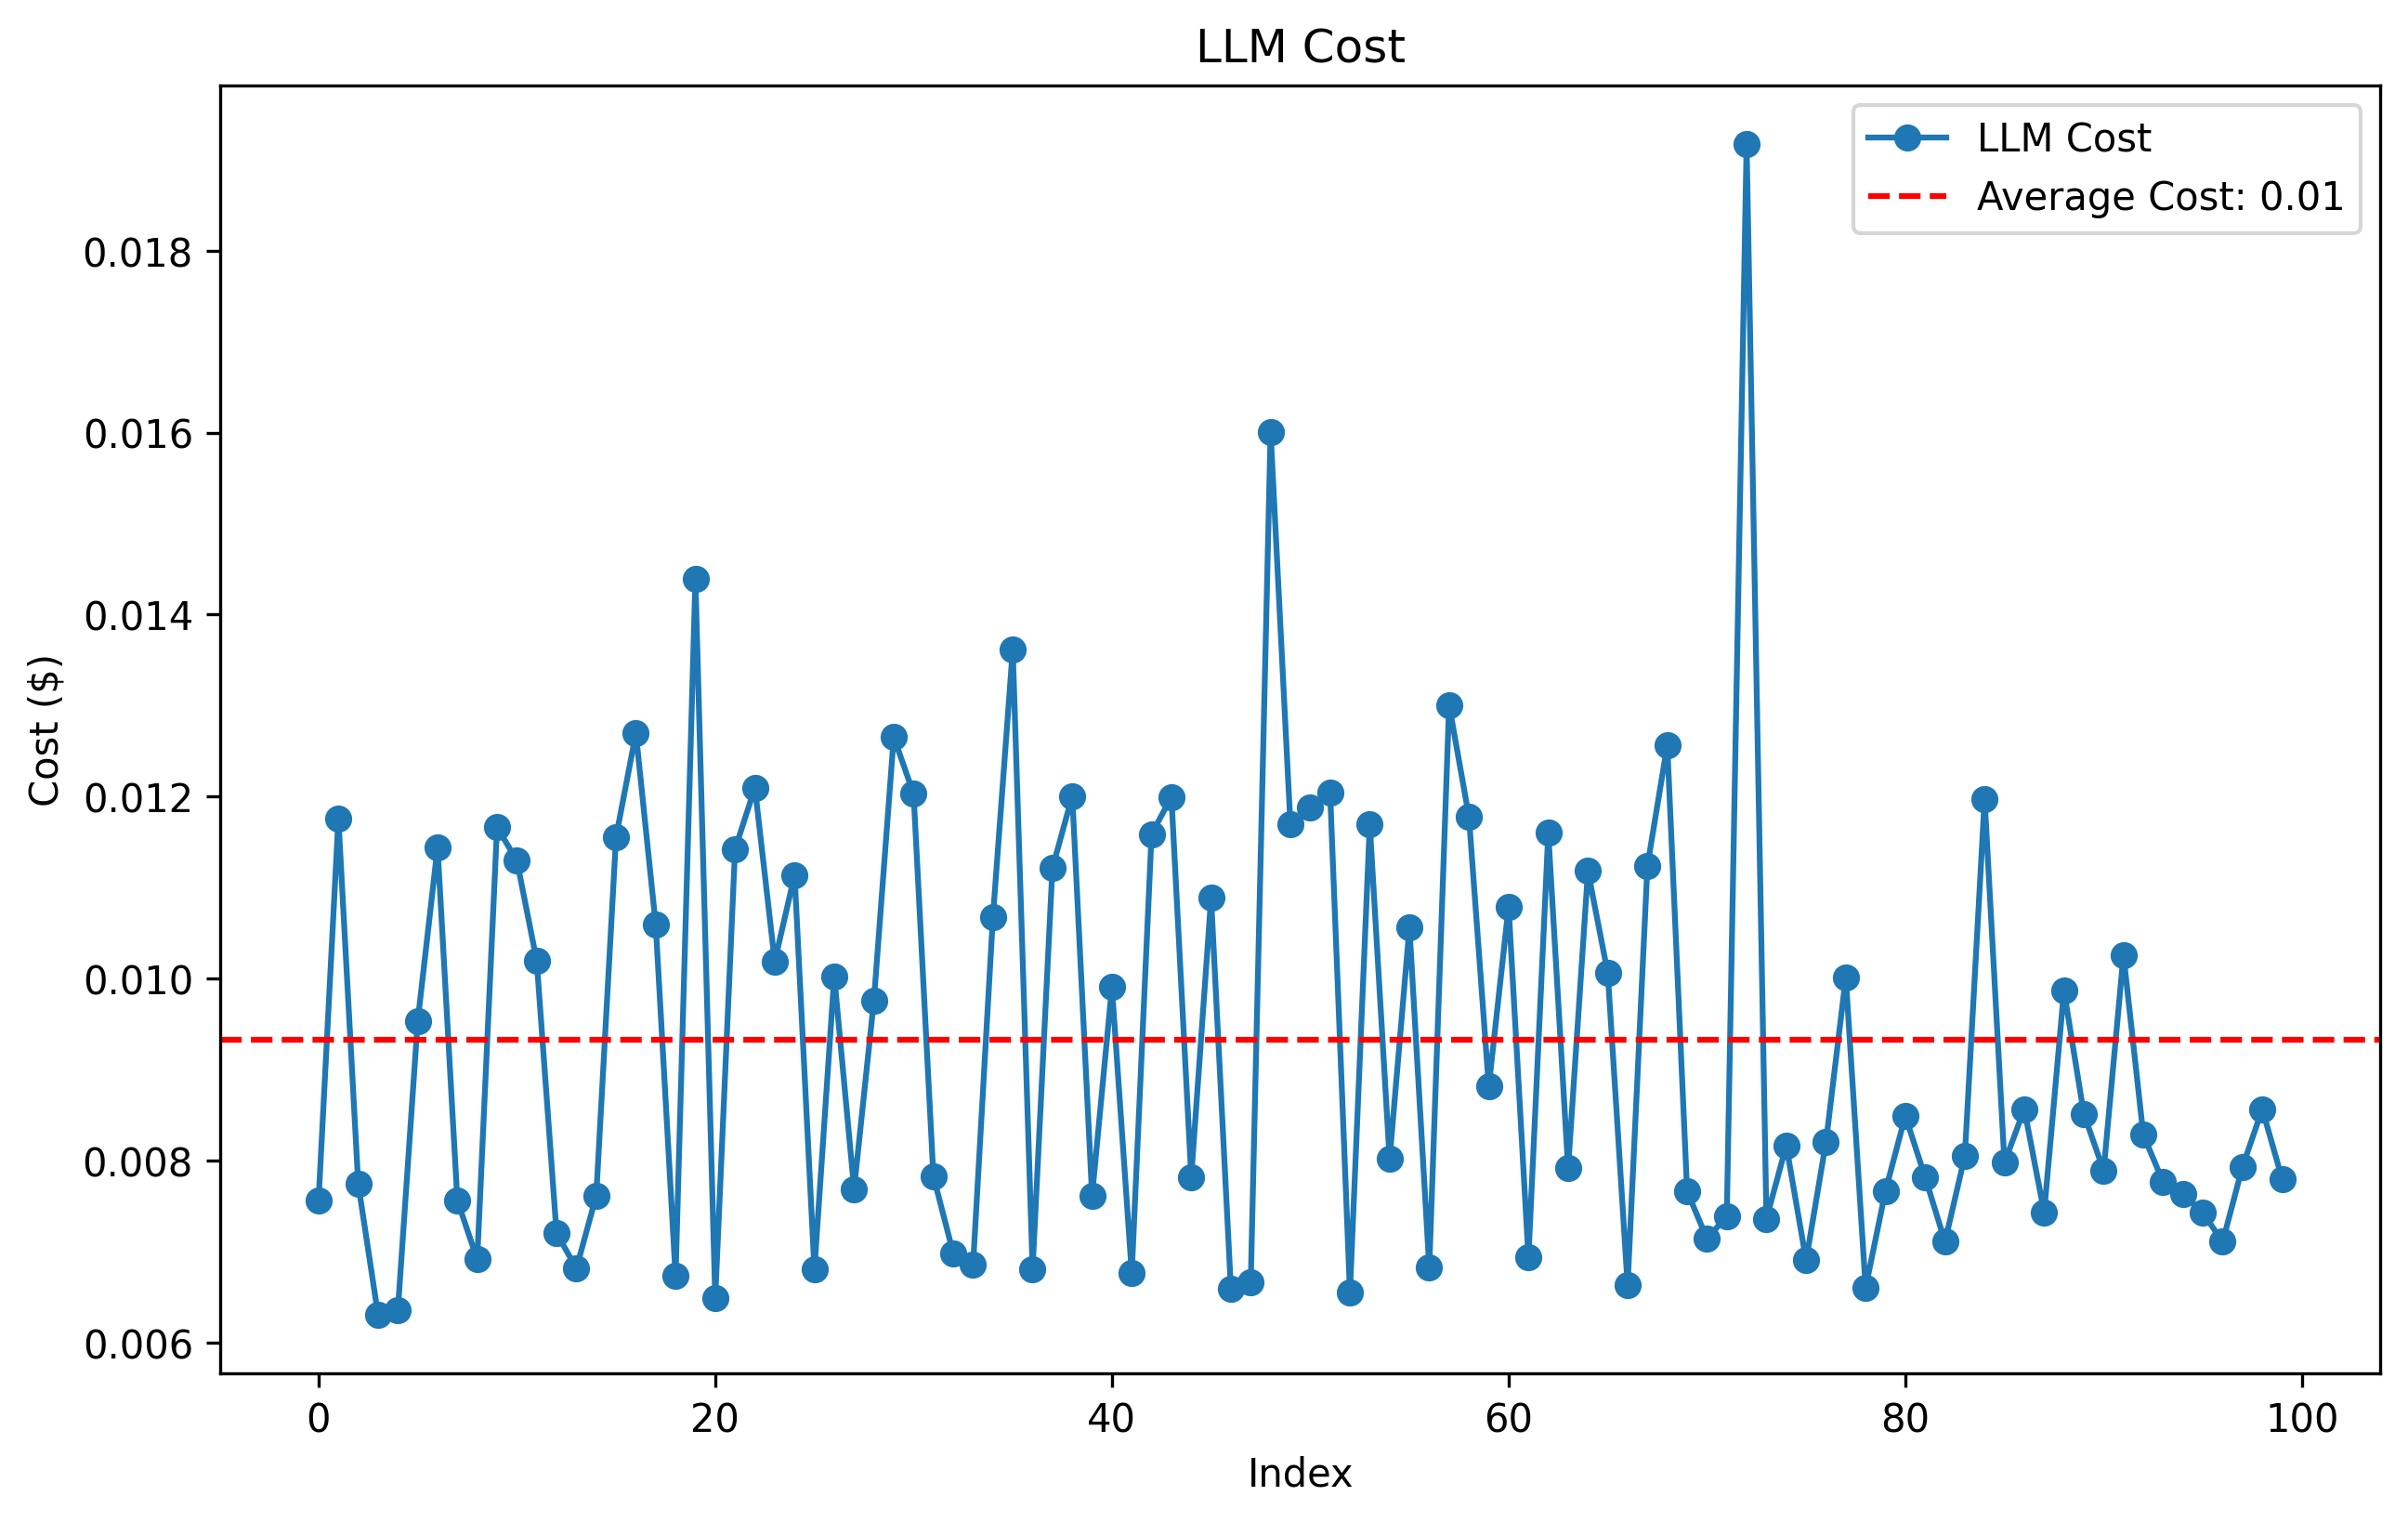

In [80]:
import matplotlib.pyplot as plt

# Calculate the average LLM cost
average_cost = df['llm_cost'].mean()

# Plot the LLM cost
plt.figure(figsize=(10, 6), dpi=300)
plt.plot(df['llm_cost'], label='LLM Cost', marker='o')

# Add a horizontal line for the average cost
plt.axhline(y=average_cost, color='r', linestyle='--', label=f'Average Cost: {average_cost:.2f}')

# Add labels and title
plt.title('LLM Cost')
plt.xlabel('Index')
plt.ylabel('Cost ($)')

# Display legend
plt.legend()

# Show plot
plt.show()


### DB Cost

In [94]:
from backend.db import connect

connection = connect()
db = connection.get_database(os.getenv("DB_NAME"))
collections = ['visits', 'visits_strings', 'visits_bits']
avg_obj_size = []

for c in collections:
    stats = db.command("collStats", c)
    print(stats)
    avg_obj_size.append(stats.get('avgObjSize'))

connection.close() 




{'ns': 'california_imr_pii_pbac.visits', 'size': 93588835, 'count': 37616, 'avgObjSize': 2488, 'numOrphanDocs': 0, 'storageSize': 43143168, 'freeStorageSize': 380928, 'capped': False, 'nindexes': 1, 'indexDetails': {'_id_': {'metadata': {'formatVersion': 8}, 'creationString': 'access_pattern_hint=none,allocation_size=4KB,app_metadata=(formatVersion=8),assert=(commit_timestamp=none,durable_timestamp=none,read_timestamp=none,write_timestamp=on),block_allocation=best,block_compressor=,cache_resident=false,checksum=on,colgroups=,collator=,columns=,dictionary=0,encryption=(keyid=,name=),exclusive=false,extractor=,format=btree,huffman_key=,huffman_value=,ignore_in_memory_cache_size=false,immutable=false,import=(compare_timestamp=oldest_timestamp,enabled=false,file_metadata=,metadata_file=,repair=false),internal_item_max=0,internal_key_max=0,internal_key_truncate=true,internal_page_max=16k,key_format=u,key_gap=10,leaf_item_max=0,leaf_key_max=0,leaf_page_max=16k,leaf_value_max=0,log=(enabled=f

In [99]:
# Prices as of 18th of September 2024; MongoDB Serverless
rpu_cost_per_4kb = 0.10 / 1000000
rpu_cost_per_doc = (avg_obj_size[0]/4000) * rpu_cost_per_4kb
rpu_cost_per_doc_pbac = (avg_obj_size[1]/4000) * rpu_cost_per_4kb
rpu_cost_per_doc_pbac_bits = (avg_obj_size[2]/4000) * rpu_cost_per_4kb

for index, row in df.iterrows():
    rpu_cost = row['db_execution_docs'] * rpu_cost_per_doc
    rpu_cost_pbac = row['db_execution_docs_pbac'] * rpu_cost_per_doc_pbac
    rpu_cost_pbac_bits = row['db_execution_docs_pbac'] * rpu_cost_per_doc_pbac_bits
    df.loc[index, 'db_cost'] = rpu_cost
    df.loc[index, 'db_cost_pbac'] = rpu_cost_pbac
    df.loc[index, 'db_cost_pbac_bits'] = rpu_cost_pbac_bits


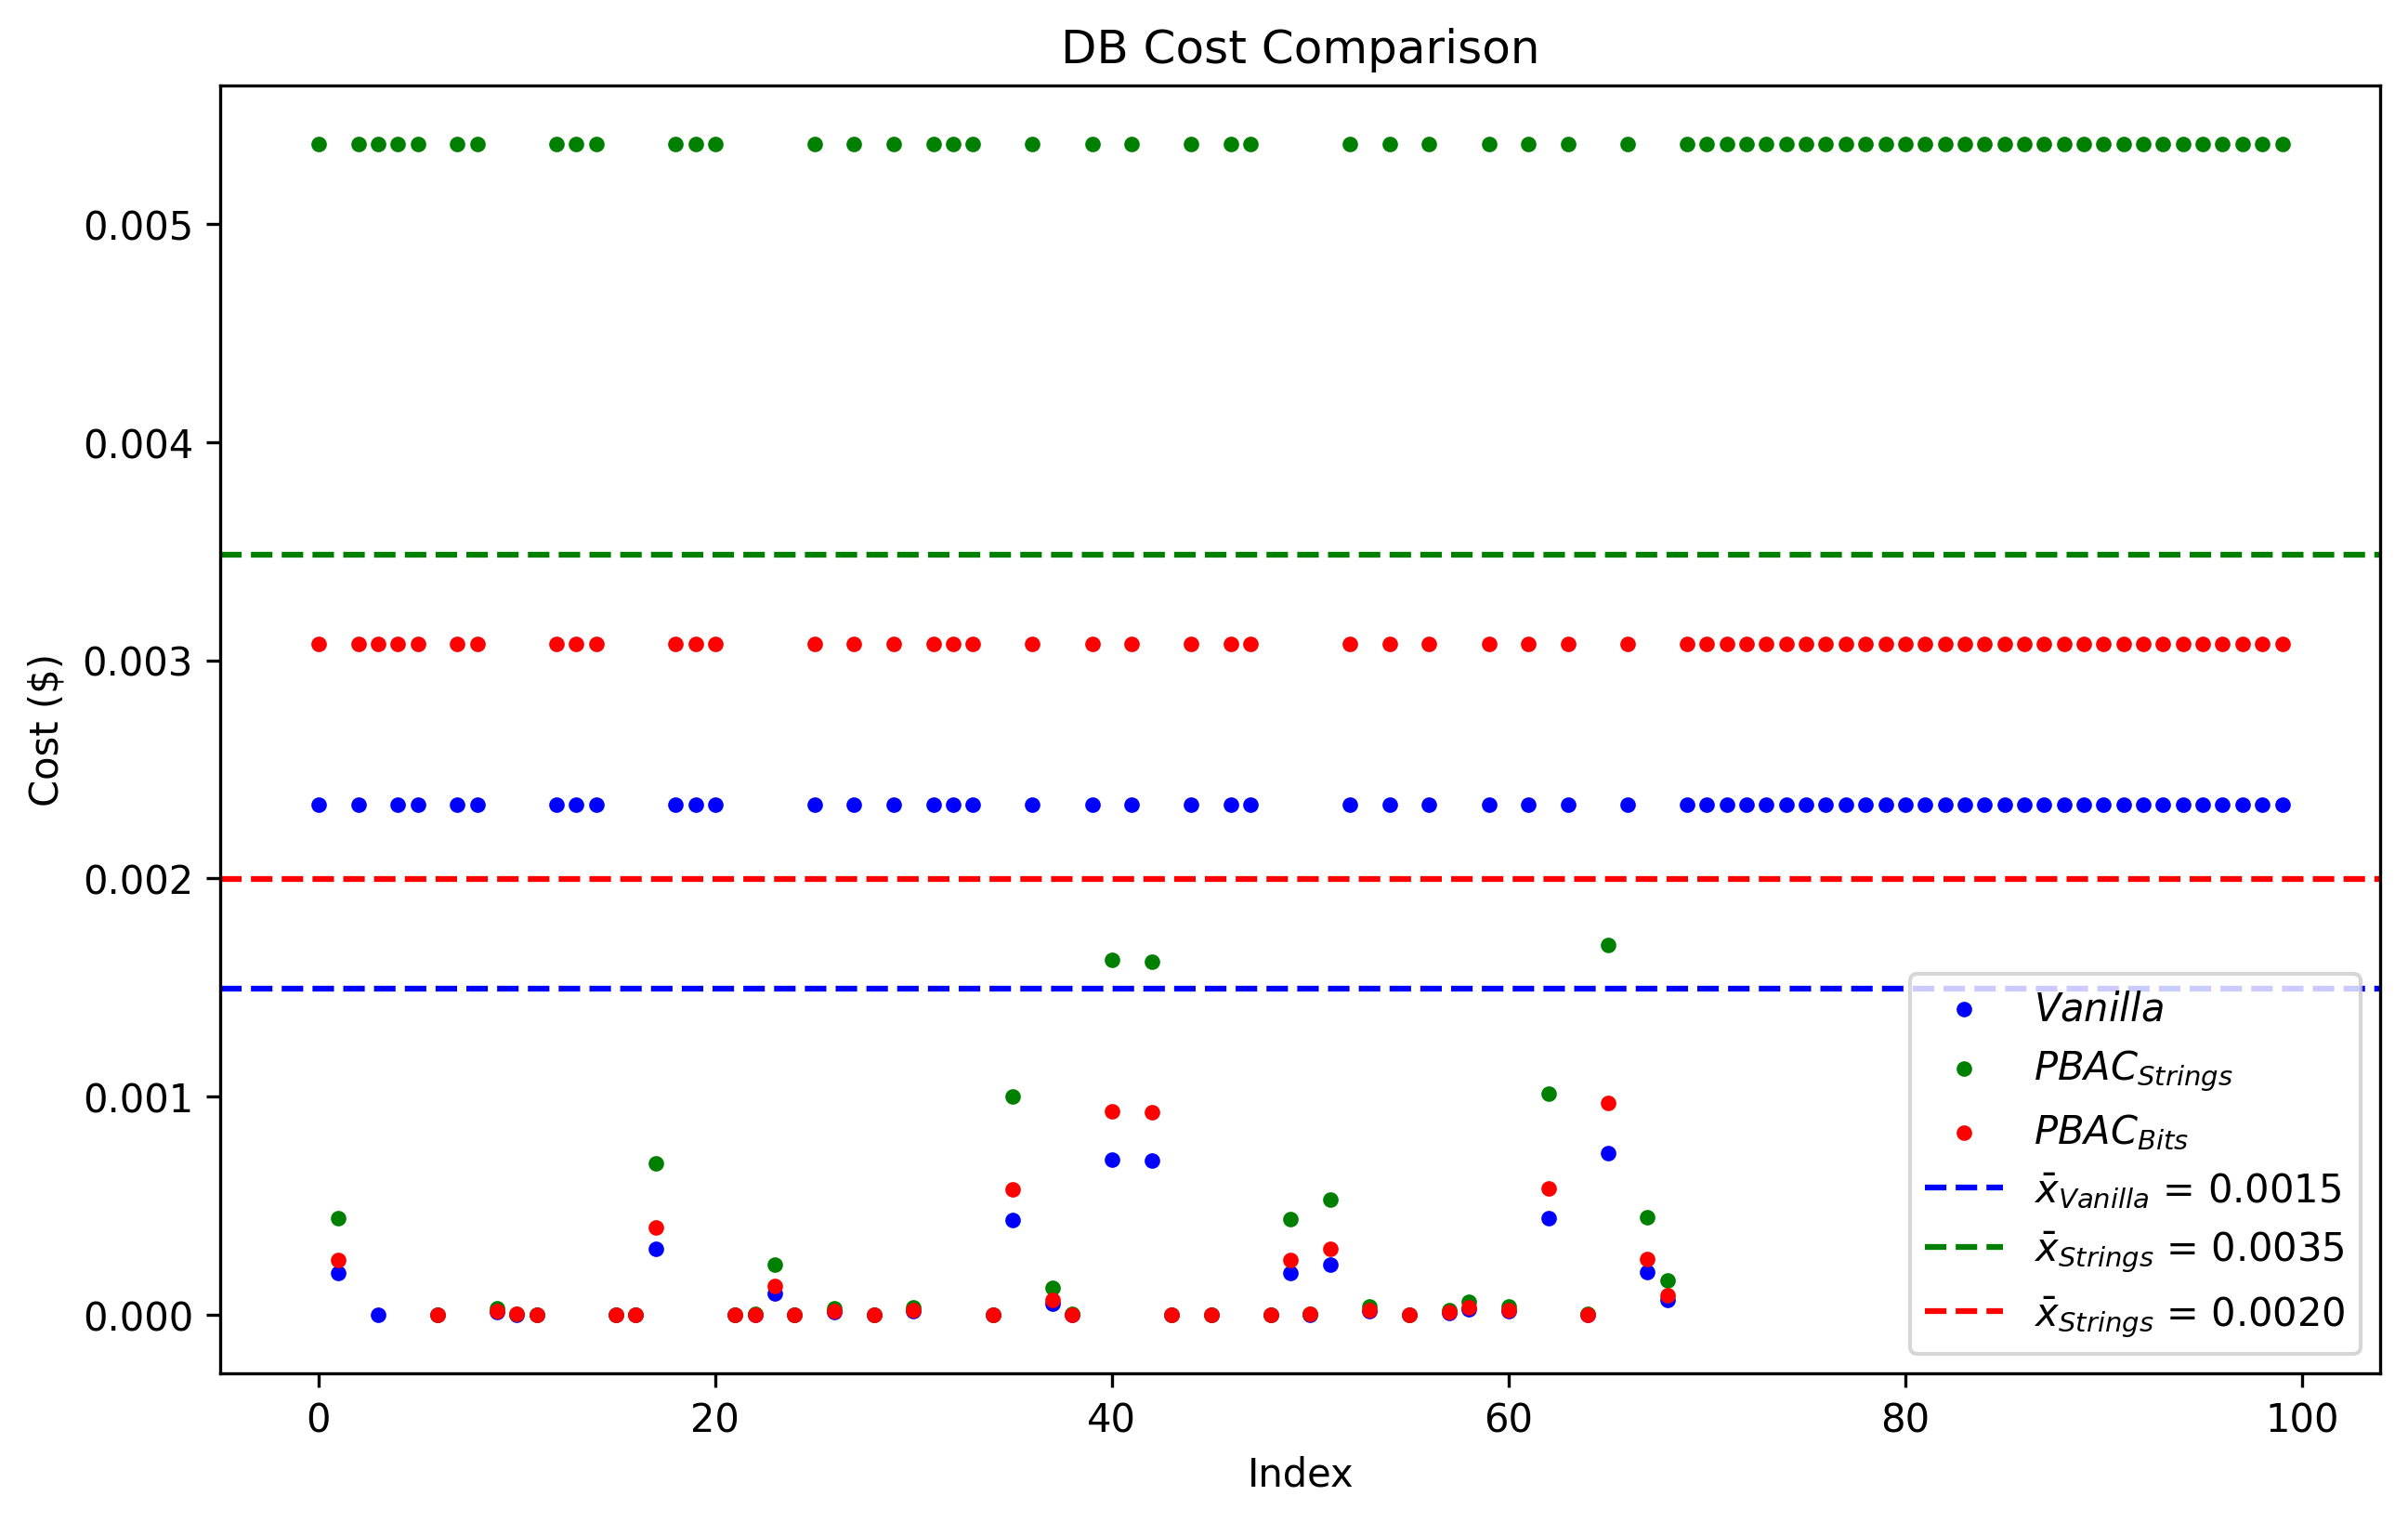

In [117]:
import matplotlib.pyplot as plt

# Calculate the averages
average_db_cost = df['db_cost'].mean()
average_db_cost_pbac = df['db_cost_pbac'].mean()
average_db_cost_pbac_bits = df['db_cost_pbac_bits'].mean()

# Plot db_cost and db_cost_pbac
plt.figure(figsize=(10, 6), dpi=300)

# Plotting db_cost
plt.scatter(df.index, df['db_cost'], label=r'$Vanilla$', marker='.', color='b')

# Plotting db_cost_pbac
plt.scatter(df.index, df['db_cost_pbac'], label=r'$PBAC_{Strings}$', marker='.', color='g')

# Plotting db_cost_pbac_bits
plt.scatter(df.index, df['db_cost_pbac_bits'], label=r'$PBAC_{Bits}$', marker='.', color='r')

# Add horizontal lines for the averages
plt.axhline(y=average_db_cost, color='b', linestyle='--', label=r'$\bar{x}_{Vanilla}$' + ' = ' + f'{average_db_cost:.4f}')
plt.axhline(y=average_db_cost_pbac, color='g', linestyle='--', label=r'$\bar{x}_{Strings}$' + ' = ' + f'{average_db_cost_pbac:.4f}')
plt.axhline(y=average_db_cost_pbac_bits, color='r', linestyle='--', label=r'$\bar{x}_{Strings}$' + ' = ' + f'{average_db_cost_pbac_bits:.4f}')


# Add labels and title
plt.title('DB Cost Comparison')
plt.xlabel('Index')
plt.ylabel('Cost ($)')

# Display legend
plt.legend()

# Show plot
plt.show()


### Total Cost

In [118]:
for index, row in df.iterrows():
    df.loc[index, 'total_cost'] = row['llm_cost'] + row['db_cost']
    df.loc[index, 'total_cost_pbac'] = row['llm_cost'] + row['db_cost_pbac']
    df.loc[index, 'total_cost_pbac_bits'] = row['llm_cost'] + row['db_cost_pbac_bits']

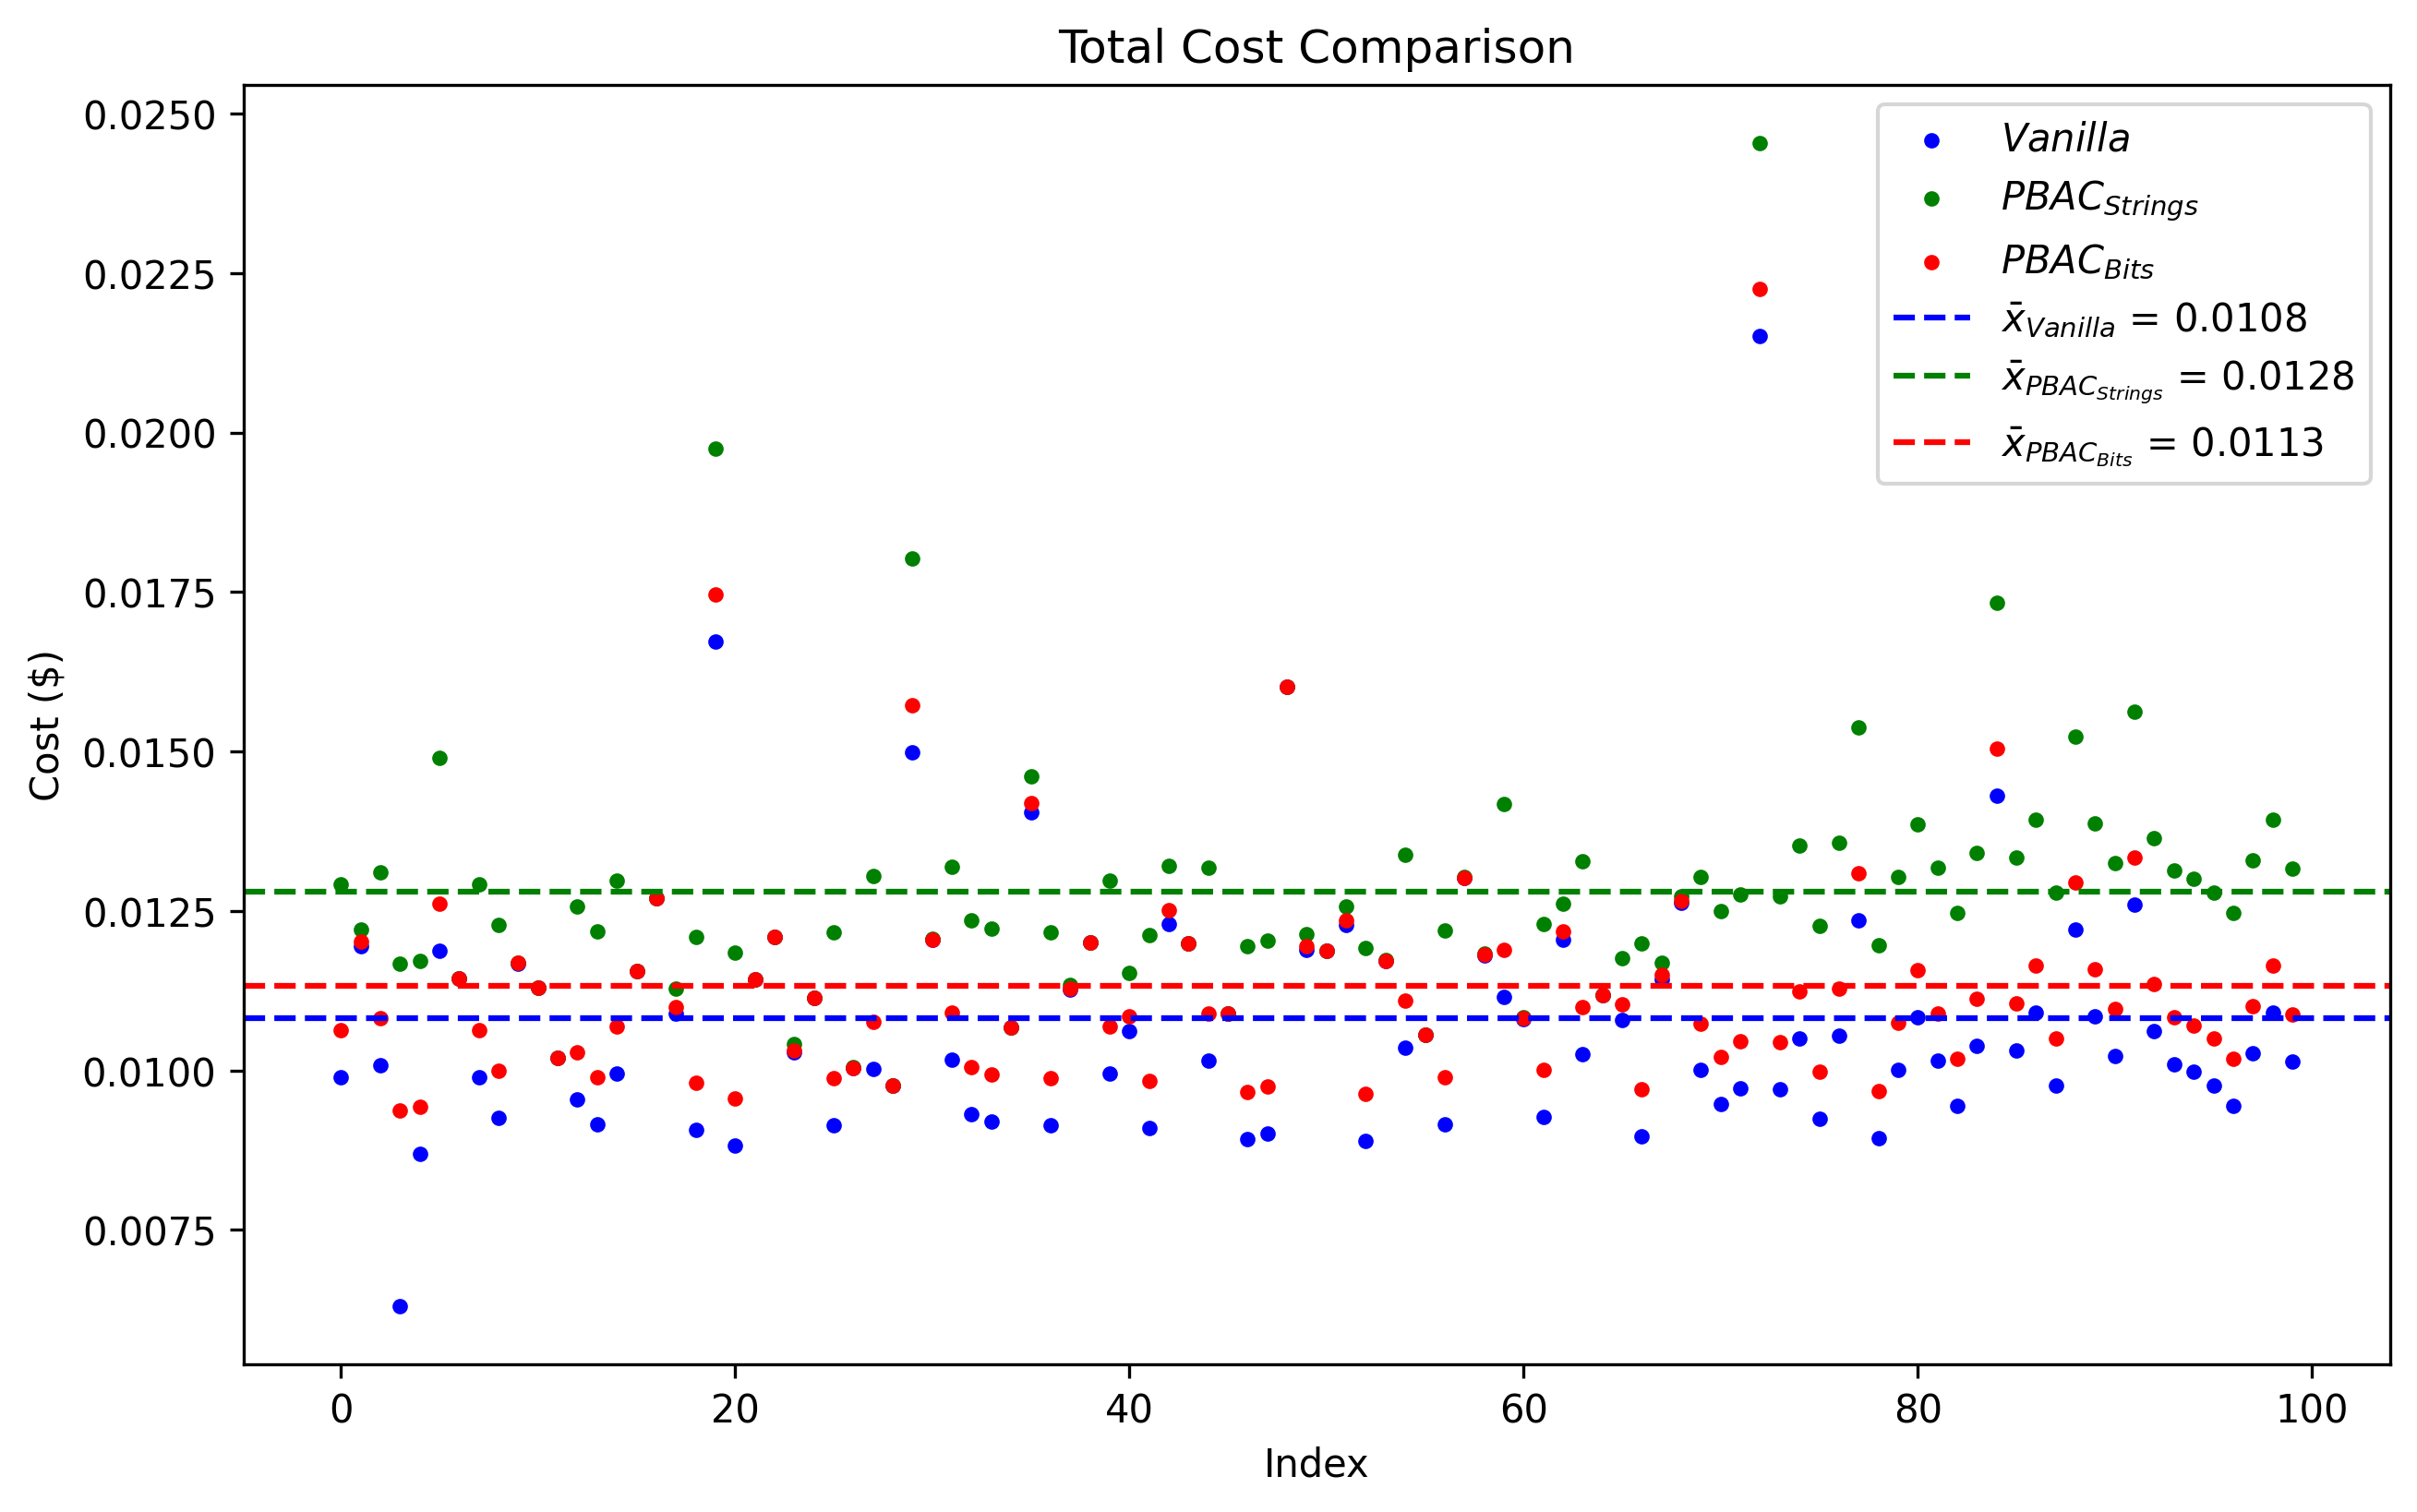

In [121]:
import matplotlib.pyplot as plt

# Calculate the averages for total costs
average_total_cost = df['total_cost'].mean()
average_total_cost_pbac = df['total_cost_pbac'].mean()
average_total_cost_pbac_bits = df['total_cost_pbac_bits'].mean()

# Plot total costs
plt.figure(figsize=(10, 6), dpi=300)

# Plotting total_cost
plt.scatter(df.index, df['total_cost'], label=r'$Vanilla$', marker='.', color='b')

# Plotting total_cost_pbac
plt.scatter(df.index, df['total_cost_pbac'], label=r'$PBAC_{Strings}$', marker='.', color='g')

# Plotting total_cost_pbac_bits
plt.scatter(df.index, df['total_cost_pbac_bits'], label=r'$PBAC_{Bits}$', marker='.', color='r')

# Add horizontal lines for the averages
plt.axhline(y=average_total_cost, color='b', linestyle='--', label=r'$\bar{x}_{Vanilla}$' + f' = {average_total_cost:.4f}')
plt.axhline(y=average_total_cost_pbac, color='g', linestyle='--', label=r'$\bar{x}_{PBAC_{Strings}}$' + f' = {average_total_cost_pbac:.4f}')
plt.axhline(y=average_total_cost_pbac_bits, color='r', linestyle='--', label=r'$\bar{x}_{PBAC_{Bits}}$' + f' = {average_total_cost_pbac_bits:.4f}')

# Add labels and title
plt.title('Total Cost Comparison')
plt.xlabel('Index')
plt.ylabel('Cost ($)')

# Display legend
plt.legend()

# Show plot
plt.show()


## Performance

Our key metric to measure performance is processing time.


To approximate the total processing, we calculate: $t = t_{llm} + t_{db}$

We derive $t_{db}$ from our collected DB metrics.

We approx. $t_{llm}$ based on avg. value for time to first token (ttft) and time per output token (tpot).

$t_{llm} = t_{ttft} + t_{tpot}*n$, where $n$ is the number of output tokens.

### Justification

In [127]:
import time

def measure_ttft_tpot(llm, prompt):
    """Measure Time To First Token and Time Per Output Token for a given prompt."""
    start = time.time()
    ttft = None
    tpot = []
    i = 0
    for chunk in llm.stream(prompt):
        if i == 0:
            ttft = time.time() - start  # Time To First Token
        else:
            tpot.append(time.time() - start)  # Time Per Output Token
        start = time.time()
        i += 1
    avg_tpot = sum(tpot) / len(tpot) # Average Time Per Output Token
    ttft = ttft - avg_tpot # Adjusting for the first token

    return ttft, avg_tpot
    

In [124]:
from faker import Faker

fake = Faker()

# Generate a paragraph with a specific number of words
paragraph = fake.text(max_nb_chars=1000)

prompt_short = fake.text(max_nb_chars=100)
prompt_medium = fake.text(max_nb_chars=1000)
prompt_long = fake.text(max_nb_chars=10000)

prompt_short

'Remember thank say agreement really bed. Support police chance get not thank music.'

In [128]:
from langchain_openai import ChatOpenAI
llm = ChatOpenAI(model="gpt-4o-mini", max_tokens=10, temperature=0)

ttft_short = []
tpot_short = []

ttft_medium = []
tpot_medium = []

ttft_long = []
tpot_long = []

for _ in range(30):
    ttft, avg_tpot = measure_ttft_tpot(llm, prompt_short)
    ttft_short.append(ttft)
    tpot_short.append(avg_tpot)

    ttft, avg_tpot = measure_ttft_tpot(llm, prompt_medium)
    ttft_medium.append(ttft)
    tpot_medium.append(avg_tpot)

    ttft, avg_tpot = measure_ttft_tpot(llm, prompt_long)
    ttft_long.append(ttft)
    tpot_long.append(avg_tpot)

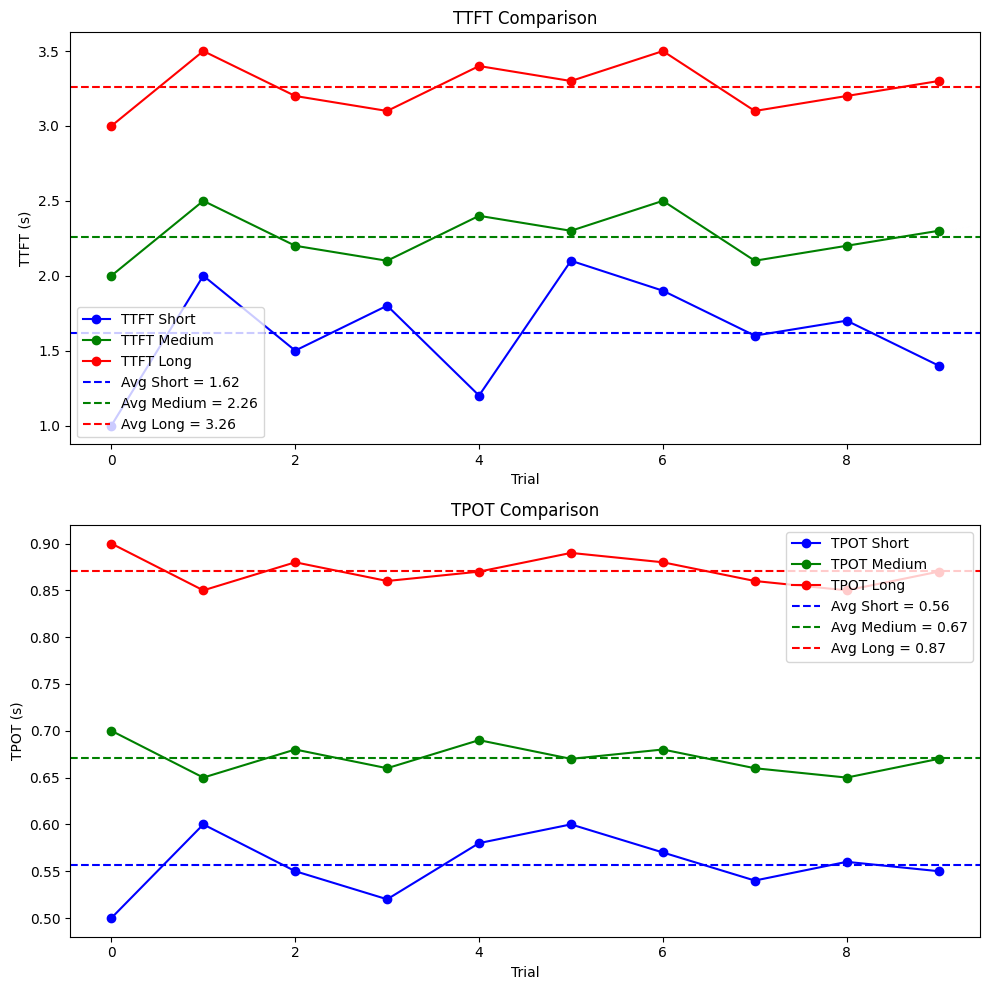

In [132]:
import matplotlib.pyplot as plt
import numpy as np

# Calculate averages
average_ttft_short = np.mean(ttft_short)
average_ttft_medium = np.mean(ttft_medium)
average_ttft_long = np.mean(ttft_long)

average_tpot_short = np.mean(tpot_short)
average_tpot_medium = np.mean(tpot_medium)
average_tpot_long = np.mean(tpot_long)

# Create subplots
fig, axs = plt.subplots(2, 1, figsize=(10, 10))

# TTFT plot
axs[0].plot(ttft_short, marker='o', label='TTFT Short', color='b')
axs[0].plot(ttft_medium, marker='o', label='TTFT Medium', color='g')
axs[0].plot(ttft_long, marker='o', label='TTFT Long', color='r')
axs[0].axhline(average_ttft_short, color='b', linestyle='--', label=f'Avg Short = {average_ttft_short:.2f}')
axs[0].axhline(average_ttft_medium, color='g', linestyle='--', label=f'Avg Medium = {average_ttft_medium:.2f}')
axs[0].axhline(average_ttft_long, color='r', linestyle='--', label=f'Avg Long = {average_ttft_long:.2f}')
axs[0].set_title('TTFT Comparison')
axs[0].set_xlabel('Trial')
axs[0].set_ylabel('TTFT (s)')
axs[0].legend()

# TPOT plot
axs[1].plot(tpot_short, marker='o', label='TPOT Short', color='b')
axs[1].plot(tpot_medium, marker='o', label='TPOT Medium', color='g')
axs[1].plot(tpot_long, marker='o', label='TPOT Long', color='r')
axs[1].axhline(average_tpot_short, color='b', linestyle='--', label=f'Avg Short = {average_tpot_short:.2f}')
axs[1].axhline(average_tpot_medium, color='g', linestyle='--', label=f'Avg Medium = {average_tpot_medium:.2f}')
axs[1].axhline(average_tpot_long, color='r', linestyle='--', label=f'Avg Long = {average_tpot_long:.2f}')
axs[1].set_title('TPOT Comparison')
axs[1].set_xlabel('Trial')
axs[1].set_ylabel('TPOT (s)')
axs[1].legend()

# Adjust layout
plt.tight_layout()

# Show plot
plt.show()
